In [6]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup as soup
import pandas as pd
import time
import sys

In [54]:
url = 'https://www.cricbuzz.com/'
try:
    response = requests.get(url, timeout=240)

    # If the response was successful, no Exception will be raised
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')  # Python 3.6
except Exception as err:
    print(f'Other error occurred: {err}')  # Python 3.6
else:
    print('Success!')

Success!


In [55]:
response.text[:200]

'\r\n\r\n<!DOCTYPE html><html lang="en" itemscope itemtype="http://schema.org/WebPage"><head><meta charset="utf-8"><script>var is_mobile = /symbian|tizen|midp|uc(web|browser)|MSIE (5.0|6.0|7.0|8.0)|tablet/'

In [59]:
# parses html into a soup data structure to traverse html
# as if it were a json data type.
time.sleep(2)
soup= BeautifulSoup(response.text, 'html.parser')

# topics = soup.find_all('h2', attrs = {'class': 'big-crd-hdln'})
desc = soup.find_all('div', attrs = {'class': 'big-crd-main cb-bg-white cb-pos-rel'})
len(desc)

9

In [110]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

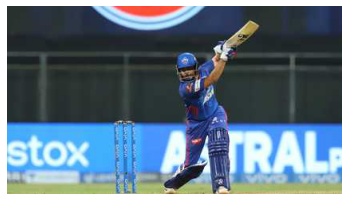

DC openers depart early : https://www.cricbuzz.com//live-cricket-scores/35632/rr-vs-dc-7th-match
Jaydev Unadkat struck twice




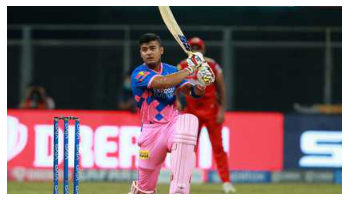

Riyan Parag: Finding feet in the finishing school : https://www.cricbuzz.com//cricket-news/117056/riyan-parag-finding-feet-in-the-finishing-school
In an exclusive interview, the 19-year-old Rajasthan Royals batsman opens up on moulding his career as a middle-order batsman and his aspirations to progress as a finisher for the national team




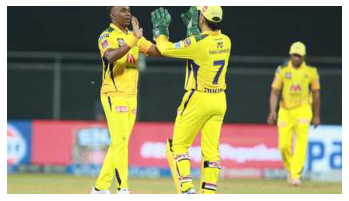

CSK look to find winning touch against unpredictable Punjab : https://www.cricbuzz.com//cricket-news/117064/csk-look-to-find-winning-touch-against-unpredictable-punjab
The MS Dhoni's led side is yet to register its first win of IPL 2021




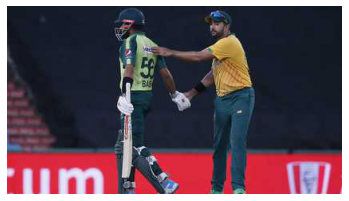

3-1 or 2-2? Two struggling bowling attacks square off in series decider : https://www.cricbuzz.com//cricket-news/117063/3-1-or-2-2-two-struggling-bowling-attacks-square-off-in-series-decider
On what should be another batting paradise at Centurion, it's the bowling that would decide which way this series goes




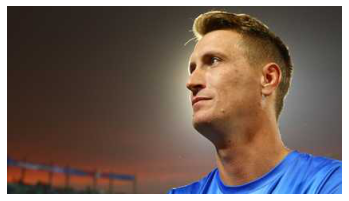

Mind over Money - the Chris Morris Journey : https://www.cricbuzz.com//cricket-news/117013/mind-over-money-the-chris-morris-journey
The IPL's most expensive recruit talks about the pressures of his price tag, how he practises his death bowling, and horrifying karaoke experiences with AB de Villiers and Dale Steyn




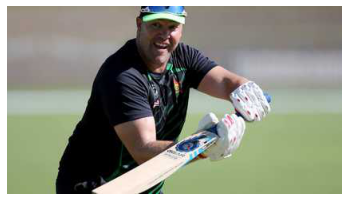

Streak handed eight-year ban for breaching ICC's anti-corruption code : https://www.cricbuzz.com//cricket-news/117043/streak-handed-eight-year-ban-for-breaching-iccs-anti-corruption-code
The former Zimbabwe skipper has accepted five charges of anti-corruption levelled against him




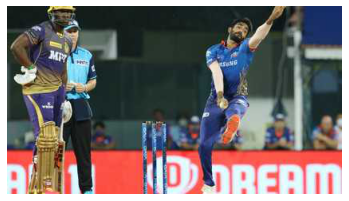

KKR left wounded after over-complicating straightforward chase : https://www.cricbuzz.com//cricket-news/117040/kkr-left-wounded-after-over-complicating-straightforward-chase
Needing 31 to win of the last five overs, Kolkata Knight Riders ended up losing the game by 10 runs




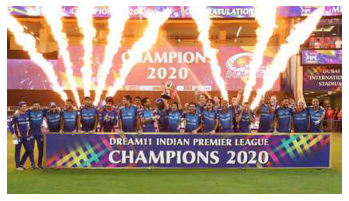

Mumbai Matrix - the formula that cracked IPL : https://www.cricbuzz.com//cricket-news/116976/mumbai-matrix-the-formula-that-cracked-ipl
How Mumbai Indians came to be the most successful team in IPL history




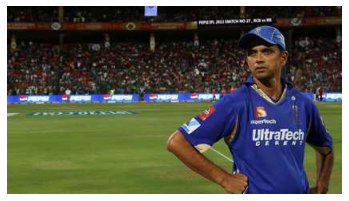

Reminiscing with Rahul : https://www.cricbuzz.com//cricket-news/116947/reminiscing-with-rahul
In the first edition of the Dialogue Room, which will present an interview every week, the former India captain recounts his fascinating journey with the most high-profile T20 league in world cricket




In [121]:
for n,i in enumerate(desc):
    link = url + i.a['href']
    img_l = url + i.a.img['src']
    topics = i.h2.a.text.strip()
    descr = i.find('div',{'class':'cb-nws-intr'}).text.strip()
    
    r = requests.get(img_l).content
    
    # Enter File Name with Extension like jpg, png etc..
    name = str(n) + '.jpg'
    with open(name,"wb+") as f:
          f.write(r)
    
    img = Image.open(name)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    print("\033[1m" + topics + "\033[0m : " + link)
    print(descr)
    print("\n")